In [1]:
import tensorflow as tf
import numpy as np
import progressbar
import matplotlib.pyplot as plt
print(tf.__version__)
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from array import array 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
# df=pd.read_csv("TATASTEEL.NS.csv")
# df.tail(5)
import seaborn as sns
from pandas import Series, DataFrame

2.4.1


Epoch 1/50
117/117 [==============================] - 17s 79ms/step - loss: 0.0152
Epoch 2/50
117/117 [==============================] - 10s 84ms/step - loss: 0.0031
Epoch 3/50
117/117 [==============================] - 9s 77ms/step - loss: 0.0027
Epoch 4/50
117/117 [==============================] - 10s 86ms/step - loss: 0.0024
Epoch 5/50
117/117 [==============================] - 9s 75ms/step - loss: 0.0024
Epoch 6/50
117/117 [==============================] - 8s 70ms/step - loss: 0.0022
Epoch 7/50
117/117 [==============================] - 9s 78ms/step - loss: 0.0022
Epoch 8/50
117/117 [==============================] - 8s 72ms/step - loss: 0.0026
Epoch 9/50
117/117 [==============================] - 8s 68ms/step - loss: 0.0018
Epoch 10/50
117/117 [==============================] - 8s 68ms/step - loss: 0.0020
Epoch 11/50
117/117 [==============================] - 8s 68ms/step - loss: 0.0019
Epoch 12/50
117/117 [==============================] - 8s 69ms/step - loss: 0.0018
Epoch 13/5

C:\Users\kethan\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\kethan\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


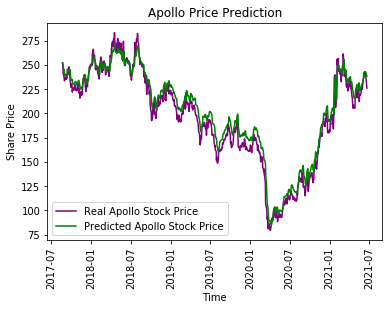

In [2]:
import yfinance as yf

stock = yf.Ticker("APOLLOTYRE.NS")
hist = stock.history(period="19y")
hist.tail(-10)
df=hist
d=30
ahead=10
n=int(hist.shape[0]*0.8)
training_set = df.iloc[:n, 1:2].values
test_set = df.iloc[n:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []
y_train = []
for i in range(d, n-ahead):
    X_train.append(training_set_scaled[i-d:i, 0])
    y_train.append(training_set_scaled[i+ahead, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 50, batch_size = 32)
model.save("APOLLO_Predict.h5")
# Getting the predicted stock price

dataset_train = df.iloc[:n, 1:2]
dataset_test = df.iloc[n:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - d:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(d, inputs.shape[0]):
    X_test.append(inputs[i-d:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
df['Date']=df.index
df=df.reset_index(drop=True)
df
plt.plot(df.loc[n:, 'Date'],dataset_test.values, color = 'purple', label = 'Real Apollo Stock Price')
plt.plot(df.loc[n:, 'Date'],predicted_stock_price, color = 'green', label = 'Predicted Apollo Stock Price')

plt.title('Apollo Price Prediction')
plt.xlabel('Time')
plt.ylabel('Share Price')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [3]:
df
## Add a dummy row at the end. This will not be used to predict. 

df.loc[len(df)]=df.loc[len(df)-1]
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
0,8.871450,9.008489,8.395421,8.554097,9242300,0.0,0.0,2002-06-21
1,8.546882,8.857021,8.366568,8.438693,4091960,0.0,0.0,2002-06-24
2,8.510823,8.828175,8.236745,8.352146,4890060,0.0,0.0,2002-06-25
3,8.352145,8.921937,8.316082,8.633435,16010830,0.0,0.0,2002-06-26
4,8.712774,8.719987,8.308871,8.388209,5910220,0.0,0.0,2002-06-27
...,...,...,...,...,...,...,...,...
4712,235.199997,238.250000,232.300003,233.000000,2415125,0.0,0.0,2021-06-16
4713,232.000000,234.600006,228.600006,229.899994,3884976,0.0,0.0,2021-06-17
4714,230.949997,232.649994,220.000000,227.199997,4940545,0.0,0.0,2021-06-18
4715,225.000000,226.000000,222.199997,224.000000,903495,0.0,0.0,2021-06-21


In [4]:
# Getting the predicted stock price

dataset_train = df.iloc[:n, 1:2]
dataset_test = df.iloc[n:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - d:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(d, inputs.shape[0]):
    X_test.append(inputs[i-d:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
float(predicted_stock_price[-1])
print("Tomorrow's predicted price of Apollo= Rs", float(predicted_stock_price[-1]))

(945, 30, 1)
Tomorrow's predicted price of Apollo= Rs 234.9164581298828
